In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [191]:
# Loading the data
train_df = pd.read_csv("Titanictrain.csv")
test_df = pd.read_csv("Titanictest.csv")
test_passenger_ids = test_df["PassengerId"]

In [193]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
print("\n📊 Survival Rate by Sex:")
print(train_df.groupby("Sex")["Survived"].mean()) # Survival Rate by Gender


📊 Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [199]:
print("\n📊 Survival Rate by Passenger Class:")
print(train_df.groupby("Pclass")["Survived"].mean()) # Survival rate by  Pessenger Class


📊 Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


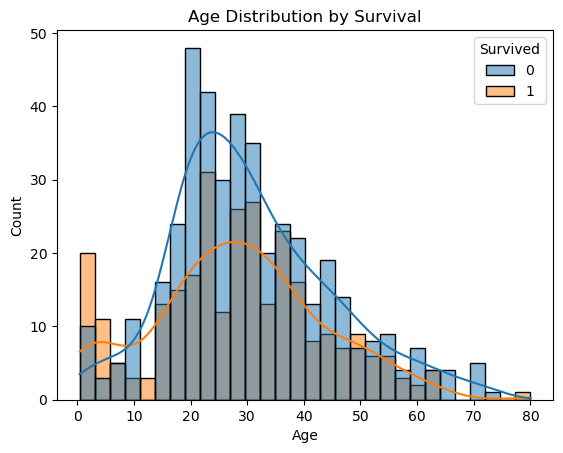

In [201]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

In [203]:
# Combine for consistent processing
combined = pd.concat([train_df, test_df], sort=False)

In [205]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [207]:
# Fill missing values
combined['Age'] = combined['Age'].fillna(combined['Age'].median())
combined['Fare'] = combined['Fare'].fillna(combined['Fare'].median())
combined['Embarked'] = combined['Embarked'].fillna(combined['Embarked'].mode()[0])

In [209]:
# Feature engineering
combined['Title'] = combined['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = (combined['FamilySize'] == 1).astype(int)

In [211]:
# Drop unneeded columns
combined.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [213]:
combined.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
FamilySize       0
IsAlone          0
dtype: int64

In [223]:
# Label encoding
le_sex = LabelEncoder()
le_sex.fit(combined["Sex"])
combined["Sex"] = le_sex.transform(combined["Sex"])

le_embarked = LabelEncoder()
le_embarked.fit(combined["Embarked"])
combined["Embarked"] = le_embarked.transform(combined["Embarked"])

le_title = LabelEncoder()
le_title.fit(combined["Title"])
combined["Title"] = le_title.transform(combined["Title"])

In [225]:
# Separate train and test again
train = combined[:len(train_df)]
test = combined[len(train_df):]

In [229]:
# Features and target
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']
X_test_final = test.drop(['Survived', 'PassengerId'], axis=1)

In [231]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
# Model training
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [239]:
# Validation accuracy
val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print(f"✅ Validation Accuracy: {accuracy:.4f}")

✅ Validation Accuracy: 0.8045



📊 Feature Importance:


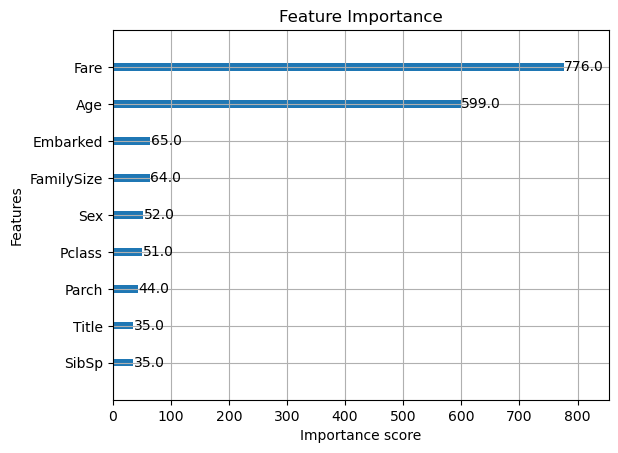

In [241]:
# Feature importance plot
print("\n📊 Feature Importance:")
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

In [243]:
# Final model training and prediction
model.fit(X, y)
predictions = model.predict(X_test_final)

D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:15:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [245]:
# Submission file
submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
print("\n✅ Submission file created: submission.csv")


✅ Submission file created: submission.csv


In [247]:
submission.to_csv("submission.csv", index=False)
print("\n✅ Submission file created: submission.csv")


✅ Submission file created: submission.csv


In [249]:
# Predict function
def predict_passenger(pclass, sex, age, sibsp, parch, fare, embarked, title):
    df = pd.DataFrame([{
        "Pclass": pclass,
        "Sex": sex,
        "Age": age,
        "SibSp": sibsp,                     # Added
        "Parch": parch,                     # Added
        "Fare": fare,
        "Embarked": embarked,
        "Title": title,
        "FamilySize": sibsp + parch + 1,
        "IsAlone": 1 if sibsp + parch == 0 else 0
    }])

    # Encode input
    df["Sex"] = le_sex.transform(df["Sex"])
    df["Embarked"] = le_embarked.transform(df["Embarked"])
    df["Title"] = le_title.transform(df["Title"])

    # Predict
    prediction = model.predict(df)[0]
    print("🧍 Passenger Prediction:", "🟢 Survived" if prediction == 1 else "🔴 Did Not Survive")


ValueError: feature_names mismatch: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone'] ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']
expected SibSp, Parch in input data